In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
from numpy import array
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
#tf.random.set_seed(7)
tf.random.set_seed(77)

In [2]:
nc_f    = './icecon.APPX.Bering_Strait.nc'
#nc_f    = './icecon.APPX.90N.135W.nc'
nc_fid  = Dataset(nc_f, 'r')
time    = nc_fid.variables['record'][:]

In [3]:
sic    = nc_fid.variables['icecon'][:,0,0]

In [4]:
nmonth  = len(time)
sic_train       =  sic[0:nmonth-12]
time_train      = time[0:nmonth-12]

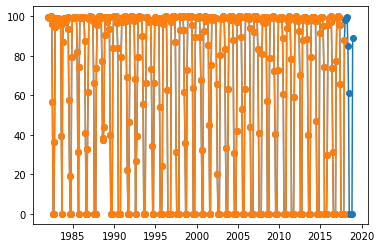

In [5]:
plt.plot(time,sic,'-o')
plt.plot(time_train,sic_train,'-o')

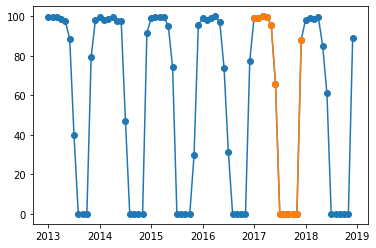

In [6]:
plt.plot(time[nmonth-72:],sic[nmonth-72:],'-o')
plt.plot(time_train[nmonth-24:nmonth-12],sic_train[nmonth-24:nmonth-12],'-o')

In [7]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                        break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return array(X), array(y)

In [8]:
n_steps = 12
X_SIC, Y_SIC = split_sequence(sic_train,n_steps)
print(X_SIC.shape)

(420, 12)


In [9]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
#model.add(Dropout(0.3))
#model.add(Dense(100))
#model.add(Dropout(0.3))
#model.add(Dense(100))
#model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_SIC, Y_SIC, epochs=2000, verbose=0)

In [10]:
sic_new = np.zeros(n_steps)

sic            at  2018.0 is  98.1
sic prediction at  2018.0 is  101.85758209228516

sic            at  2018.0833 is  99.1
sic prediction at  2018.0833 is  102.65895080566406

sic            at  2018.1666 is  98.8
sic prediction at  2018.1666 is  99.86714935302734

sic            at  2018.25 is  99.4
sic prediction at  2018.25 is  99.95291137695312

sic            at  2018.3333 is  85.1
sic prediction at  2018.3333 is  100.94925689697266

sic            at  2018.4166 is  61.0
sic prediction at  2018.4166 is  70.61045837402344

sic            at  2018.5 is  0.0
sic prediction at  2018.5 is  -3.8648667335510254

sic            at  2018.5833 is  0.0
sic prediction at  2018.5833 is  -1.9246039390563965

sic            at  2018.6666 is  0.0
sic prediction at  2018.6666 is  1.5730621814727783

sic            at  2018.75 is  0.0
sic prediction at  2018.75 is  2.7646994590759277

sic            at  2018.8333 is  0.0
sic prediction at  2018.8333 is  16.261192321777344

sic            at  2018.9

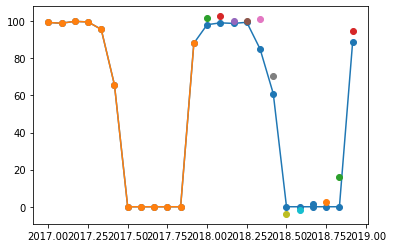

In [11]:
plt.plot(time[nmonth-24:],sic[nmonth-24:],'-o')
plt.plot(time_train[nmonth-24:nmonth-12],sic_train[nmonth-24:nmonth-12],'-o')
for i in range(n_steps):
        x_input = sic[nmonth-24+i:nmonth-12+i]
        #print(time[nmonth-24+i:nmonth-12+i])
        x_input = x_input.reshape((1, n_steps))
        
        #print(x_input)
        sic_new[i] = model.predict(x_input, verbose=0)
        print('sic            at ', time[nmonth-12+i],'is ', sic[nmonth-12+i])
        print('sic prediction at ', time[nmonth-12+i],'is ', sic_new[i])
        print('')
        plt.plot(time[nmonth-12+i],sic_new[i],'-o')
        #input('press return to continue')